# 1. Formula

Description: k is the number of failure events, n is the number of successful events, and p is the successful probability.

Probability Density Function:

$$f(k) = P(X = k) = \binom{k+n-1}{n-1}(1-p)^{k}p^n$$

# 2. Negative Binomial Distribution

In [1]:
from scipy.stats import nbinom
import seaborn as sb

In [2]:
# Generate a random sample data with size = 1000, number of successful events = 3, 
# and the successful probability = 0.09
random_sample = nbinom.rvs(n = 3, p = 0.09, size = 1000)

[Text(0,0.5,'Frequency'),
 Text(0.5,1,'Negative Binomial Distribution with size = 1000, p = 0.09, n = 3')]

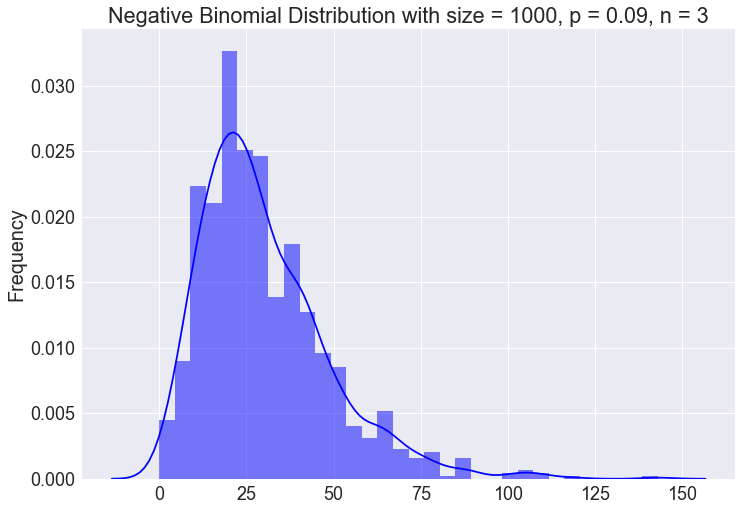

In [3]:
# Notice: For the Negative Binomial Distribution, there is no upper bound for x-axis
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(random_sample, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Negative Binomial Distribution with size = 1000, p = 0.09, n = 3', ylabel = 'Frequency')

[Text(0,0.5,'Frequency'),
 Text(0.5,1,'Negative Binomial cumulative distribution')]

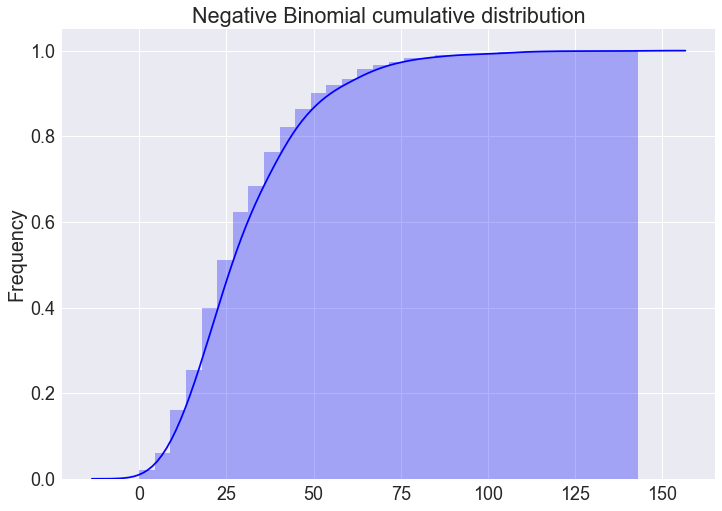

In [4]:
# CDF visualization
sb.set(rc = {'figure.figsize':(11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(random_sample, kde = True, color = 'blue',\
                 hist_kws = dict(cumulative = True, alpha = 0.3),\
                 kde_kws = dict(cumulative = True))
ax.set(title = 'Negative Binomial cumulative distribution', ylabel = 'Frequency')

# 3. Statistics of Negative Binomial Distribution

$$E(X) = \frac{r * (1-p)}{p}$$

In [5]:
round(nbinom.mean(n = 3, p = 0.09), 4)

30.3333

In [6]:
# By hand calculations
r = 3
p = 0.09
print(round((r*(1-p))/p, 4))

30.3333


$$Var(X) = \frac{r*(1-p)}{p^2}$$

$$Std(X) = \sqrt{Var(X)}$$

In [7]:
round(nbinom.var(n = 3, p = 0.09), 4)

337.037

In [8]:
# By hand calculations
round((r*(1-p))/p**2, 4)

337.037

In [9]:
round(nbinom.std(n = 3, p = 0.09), 4)

18.3586

In [10]:
# By hand calculations
round(337.03703703703707**(1/2), 4)

18.3586

# 4. Example
- **A person conducting telephone surveys must get 3 more completed surveys before their job is finished. On each randomly dialed number, there is a 9% chance of reaching an adult who will complete the survey. What is the probability the 3rd completed survey occurs on the 10th call?**

In [11]:
# To answer this question, we can use nbinom.pmf.
print('The probability that the 3rd completed survey occurs on the 10th call is'
      ,round(nbinom.pmf(k = 7, n = 3, p = 0.09, loc = 0), 4))

The probability that the 3rd completed survey occurs on the 10th call is 0.0136


In [12]:
# The cdf when k = 7
nbinom.cdf(k = 7, n = 3, p = 0.09, loc=0)

0.05404001544936003

In [13]:
# If we are interested in looking back the k, we can use the nbinom.ppf 
# (the inverse of cdf) to attain k, and further we can know the total number of events = 10 (7 + 3)
nbinom.ppf(q = 0.05404001544936003, n = 3, p = 0.09, loc=0)

7.0